In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

In [60]:
# assumption: rows and columns ranges always start at 1
rows_interval = 8
rows_min = 8
rows_max = 128
rows = int(rows_max/rows_interval) - int(rows_min/rows_interval) + 1

columns_interval = 8
columns_min = 8
columns_max = 128
columns = int(columns_max/columns_interval) - int(columns_min/columns_interval) + 1

batch_count = 1000

operation = "op_n"
precision = 64

median_array = np.zeros((rows, columns))
master_array = np.zeros(100)

In [61]:
# for n in n_range:
# load data
for i, n in enumerate(range(rows_min, rows_max + 1, rows_interval)):
    for j, m in enumerate(range(columns_min, columns_max + 1, columns_interval)):
        try:
            directoryname = f"blas_results/{operation}_{precision}/{n}_{m}_{batch_count}"
            filename = "results.csv"
            df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
            subtracted_df = df["EndNs"] - df["BeginNs"]
            subtracted_array = subtracted_df.to_numpy()
            median_array[i, j] = np.median(subtracted_array) / 1000
        except:
            print(n,m)
# directoryname = "blas_results/OP_N_64/10_10_100"
# filename = "results.csv"
# df = pd.read_csv(f"{directoryname}/{filename}", usecols=["BeginNs", "EndNs"])
# subtracted_df = df["EndNs"] - df["BeginNs"]
# subtracted_array = subtracted_df.to_numpy()
# subtracted_array = subtracted_array.transpose()
# master_array = np.vstack((master_array, subtracted_array))
# master_array = np.delete(master_array, 0, axis=0)

In [62]:
print(master_array.shape)
print(master_array)

(100,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [63]:
print(np.max(median_array))
# REMOVE THIS LATER
# accounting for spike at 128x128
median_array[-1,-1] = 0
print(np.max(median_array))
median_array[-1,-1] = None

480.8065
49.921


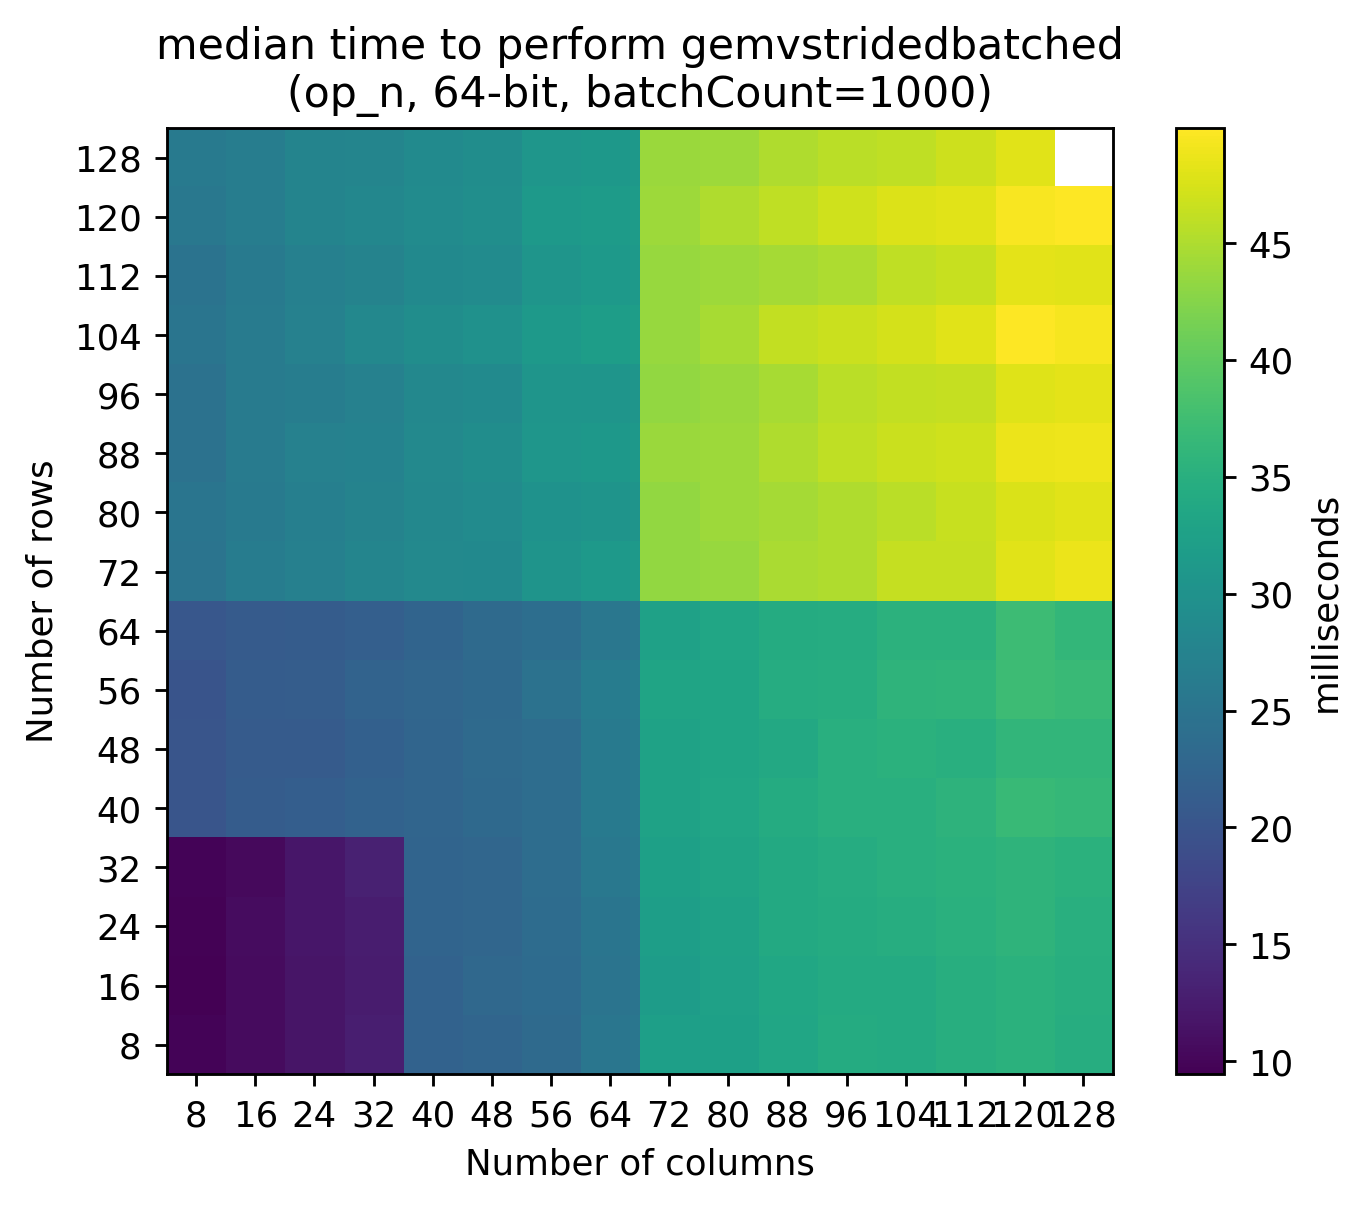

In [64]:
fig, ax = plt.subplots(dpi=256)

c = ax.imshow(median_array, 
              origin="lower", 
              interpolation='none',
              extent=[columns_min-columns_interval/2,
                      columns_max+columns_interval/2,
                      rows_min-rows_interval/2,
                      rows_max+rows_interval/2,
                      ],
)
plt.title(
    f"median time to perform gemvstridedbatched\n({operation}, {precision}-bit, batchCount={batch_count})"
)
plt.xlabel("Number of columns")
plt.ylabel("Number of rows")
cbar = plt.colorbar(c)
cbar.ax.set_ylabel("milliseconds")
plt.xticks(range(rows_min, rows_max + 1, rows_interval))
plt.yticks(range(columns_min, columns_max + 1, columns_interval))

plt.show()

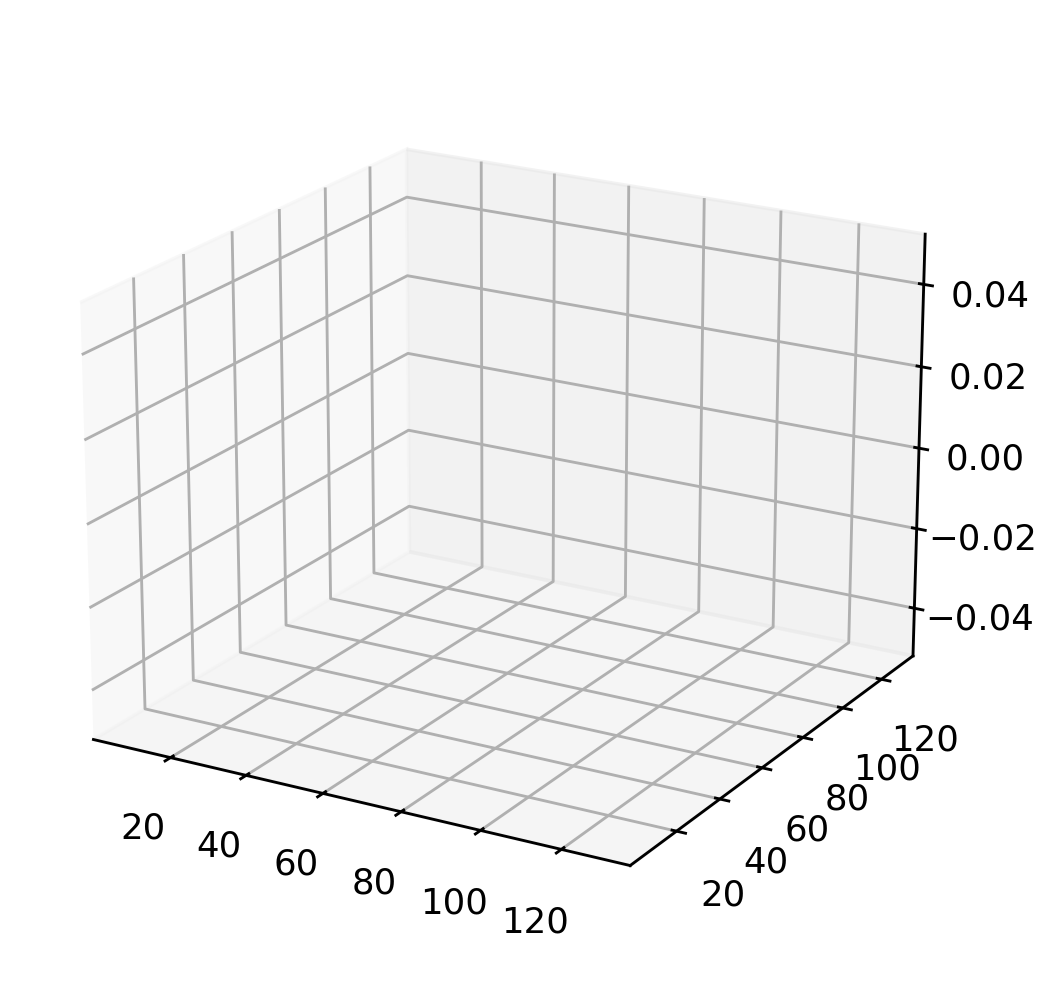

In [65]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=256)

X = np.arange(rows_min, rows_max + 1, rows_interval)
Y = np.arange(columns_min, columns_max + 1, columns_interval)
X, Y = np.meshgrid(X, Y)

Z = median_array[X%8 - 1, Y%8 - 1]

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(elev=20.0, azim=-60)
plt.show()